# Preface

Objectives:
1. Learn to use the `keras` API
2. Explore how performance of fully connected neural networks depend on its hyper-parameters
3. Explore the effect of learning rate and batch size on training and testing performance

Due: 4 Feb 2023

In [1]:
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
sns.set(font_scale=1.5)

# The Fashion MNIST Dataset

As mentioned in class the saying,
> *If you model works for MNIST, it may not work for anything else, but if it doesn't work for MNIST, it won't work for anything else*

Here in this notebook you will go beyond the MNIST dataset, albeit only a little bit. We will use the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset, which is designed to replace MNIST as the new minimal dataset to test vision tasks. 

It is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Thus, it is almost exactly like the MNIST dataset for digit recognition, but the classification problem is generally harder.


Here are some example images:
![Fashion MNIST](https://markusthill.github.io/images/2017-10-12-zalandos-fashion-mnist-dataset/zalando10x10.jpeg)

# Importing the Dataset

Just like MNIST, this dataset is found in the `tf.keras.datasets` module.

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


The following is a dictionary of labels that will map the y_train/y_test labels into words

In [3]:
label_dict = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot',
}
labels_train = [label_dict[u] for u in y_train]
labels_test = [label_dict[u] for u in y_test]

Text(0.5, 1.0, 'Label = Ankle boot')

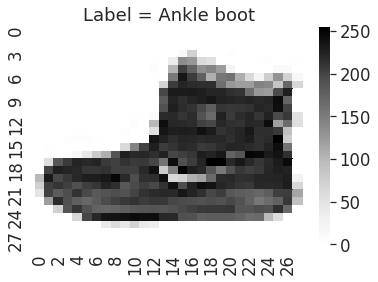

In [4]:
ax = sns.heatmap(x_train[0], cmap='Greys')
ax.set_title(f'Label = {labels_train[0]}')

# Task 1: Build a Shallow NN for Classification

Build and train a shallow (one-hidden-layer) neural network with 128 hidden nodes to classify these images. Remember to perform appropriate preprocessing steps, such as normalization and one-hot representations.

Evaluate carefully the performance of your training and the final model's performance. Discuss any interesting phenomena you discover.

### Step1: Preprocessing: normalization and one-hot encoding

In [5]:
# reshape and normalization
x_train = x_train.reshape(-1, 784) / 255.0
x_test = x_test.reshape(-1, 784) / 255.0

# one-hot encoding for labels
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

### Step2: Build model with one hidden layer
#### **Hidden Layer**
<i>Units</i> = 128, <i>Activation function</i> = ReLU
#### **Output Layer**
<i>Units</i> = 10, <i>Activation function</i>: softmax
#### **Training Configuration**
<i>Optimizer</i>: SGD with learning rate 0.25, <i>Loss function</i>: Cross-Entropy, <i>Metrics</i>: Accuracy

In [6]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

model = Sequential([
    Dense(units=128, activation='relu'),
    Dense(units=10, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.25), metrics=['accuracy'])

### Step3: Train Model
**Hyper-parameters**:
1. Number of epochs to train the model: 200
2. Number of samples per gradient update: training data size (60000)
3. Validation split: 0.2 (use 20% of training data as validation)

In [17]:
history = model.fit(x=x_train,
                    y=y_train,
                    epochs=200,
                    batch_size=x_train.shape[0],
                    validation_split=0.2
                    # validation_data=(x_test, y_test)
                    )

Epoch 1/200
1/1 [==============================] - 1s 619ms/step - loss: 0.3980 - accuracy: 0.8598 - val_loss: 0.4071 - val_accuracy: 0.8540
Epoch 2/200
1/1 [==============================] - 1s 554ms/step - loss: 0.3952 - accuracy: 0.8592 - val_loss: 0.4048 - val_accuracy: 0.8556
Epoch 3/200
1/1 [==============================] - 0s 364ms/step - loss: 0.3969 - accuracy: 0.8604 - val_loss: 0.4066 - val_accuracy: 0.8531
Epoch 4/200
1/1 [==============================] - 0s 358ms/step - loss: 0.3947 - accuracy: 0.8590 - val_loss: 0.4051 - val_accuracy: 0.8558
Epoch 5/200
1/1 [==============================] - 0s 366ms/step - loss: 0.3971 - accuracy: 0.8602 - val_loss: 0.4070 - val_accuracy: 0.8533
Epoch 6/200
1/1 [==============================] - 0s 357ms/step - loss: 0.3949 - accuracy: 0.8593 - val_loss: 0.4062 - val_accuracy: 0.8552
Epoch 7/200
1/1 [==============================] - 0s 360ms/step - loss: 0.3984 - accuracy: 0.8594 - val_loss: 0.4078 - val_accuracy: 0.8532
Epoch 8/200
1

### Step4: Examine Training Curve
With increasing number of epochs, loss function dcreases and model accuracy increases, which indicates that model performance will get better with higher number of epochs, but it will take a long time to finish training.

After 200 epochs, model accuracy on validation set reaches **86.2%**.

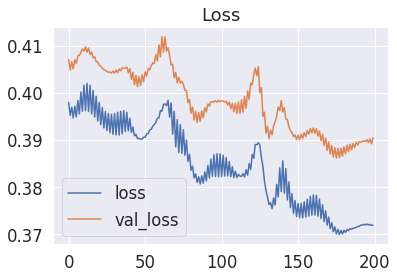

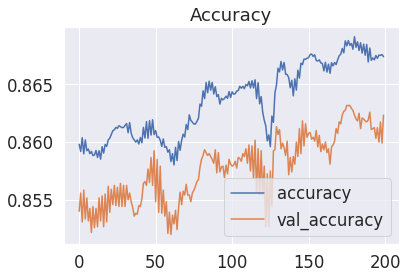

In [18]:
history = pd.DataFrame(history.history)
history.plot(y=['loss', 'val_loss'], title='Loss')
history.plot(y=['accuracy', 'val_accuracy'], title='Accuracy')

### Step5: Evaluate Model Performance: Confusion Matrix
The test set has **overall accuracy as 84.8%**.
Most categories have high accuracies (over 80%) except label 6 (shirts). Shirts can be easily mislabelled as coats, pullovers, or t-shirts.


In [24]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)
# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.8479999899864197


313/313 [==============================] - 0s 1ms/step


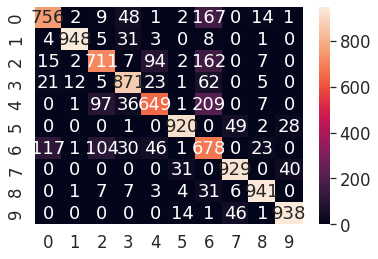

In [14]:
from sklearn.metrics import confusion_matrix

y_test_predict = model.predict(x_test)
cmatrix = confusion_matrix(y_true=y_test.argmax(1), y_pred=y_test_predict.argmax(1))
sns.heatmap(cmatrix, annot=True, fmt="d")

# Task 2: Dependence on Hyper-parameters

Now, investigate the dependence of the neural network's performance on some hyper-parameters. In particular, you should investigate the dependence on the following:

1. Number of hidden nodes
2. The activation function
3. Loss functions

Discuss any interesting findings and insights.

**KeraTuner is used for parameter tuning.**

In [25]:
# !pip install keras-tuner --upgrade
import keras_tuner as kt

### Step1: Define the Model


*   *Number of hidden nodes*: 32 to 512 with stepsize 32
*   *The activation function*: ReLU, Sigmoid, Tanh
*   *Loss function*: Multi-Class Cross-Entropy Loss, Sparse Multiclass Cross-Entropy Loss, Kullback Leibler Divergence Loss





In [30]:
def model_builder(hp):
  model = Sequential()

  # Tune the number of units in the first Dense layer
  hp_units = hp.Int('units', min_value=32, max_value=512, step=32)

  # Tune the activation function in the first Dense layer
  hp_activation = hp.Choice('activation_function', values=['relu', 'sigmoid', 'tanh'])

  model.add(Dense(units=hp_units, activation=hp_activation))
  model.add(Dense(units=10, activation='softmax'))

  # Tune the loss function for the optimizer
  hp_loss = hp.Choice('loss_function', values=['categorical_crossentropy', 'sparse_categorical_crossentropy', 'kullback_leibler_divergence'])

  model.compile(optimizer=SGD(learning_rate=0.25),
                loss=hp_loss,
                metrics=['accuracy'])

  return model

### Step2: Instantiate the tuner

In [31]:
tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='my_dir',
                     project_name='dsa5204_hw1_kt')

### Step3: Start the Search

After tuning, here is the result.


*   *Best Number of hidden nodes*: **96**
*   *Best activation function*: **Tanh**
*   *Best Loss function*: **Kullback Leibler Divergence Loss**



In [33]:
tuner.search(x_train, y_train, epochs=50, validation_split=0.2)

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')}, the best activation function for the hidden layer
is {best_hps.get('activation_function')}, and the best loss function for compile is {best_hps.get('loss_function')}.
""")

Trial 35 Complete [00h 01m 22s]
val_accuracy: 0.8775833249092102

Best val_accuracy So Far: 0.8814166784286499
Total elapsed time: 00h 14m 53s

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 96, the best activation function for the hidden layer
is tanh, and the best loss function for compile is kullback_leibler_divergence.

